# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import os 
from matplotlib import pyplot as plt

In [2]:
path_orders = os.path.join('Datasets', 'instacart_orders.csv')
path_products = os.path.join('Datasets', 'products.csv')
path_aisles = os.path.join('Datasets', 'aisles.csv')
path_departments = os.path.join('Datasets', 'departments.csv')
path_orders_pr = os.path.join('Datasets', 'order_products.csv')

# leer conjuntos de datos en los DataFrames
df_ins_order = pd.read_csv(path_orders,sep=';')
df_products = pd.read_csv(path_products,sep=';')
df_aisles = pd.read_csv(path_aisles,sep=';')
df_departments = pd.read_csv(path_departments, sep=';')
df_orders_pr = pd.read_csv(path_orders_pr, sep= ';')

In [3]:
# mostrar información del DataFrame
df_ins_order.info()
df_ins_order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# mostrar información del DataFrame
df_products.info()
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# mostrar información del DataFrame
df_aisles.info()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# mostrar información del DataFrame
df_departments.info()
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# mostrar información del DataFrame
df_orders_pr.info(show_counts=True)
df_orders_pr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:
- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.
Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

1. en la celda donde se llaman a los dataframes se hace el ajuste del separador con ; para que los dataframes tengan bien su estrucura por filas y columnas
2. verificar los tipos de datos que hay en cada uno de los dataframes y corregir los tipos de datos como los object que deberias ser int64 o float64
3. verificar los máximos y minimos de ser necesario
4. completar los valores ausentes de cada uno de los dataframe
5. identificar y eliminarlos valores duplicados

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
df_ins_order.info() #verficar los tipos de datos según cada columna
print()

#Identifica y completa los valores ausentes.
print(df_ins_order.isna().sum())
print()
df_ins_order['days_since_prior_order'].fillna(0,inplace=True)
print()

#Identifica y elimina los valores duplicados.
print(f"datos duplicados:", df_ins_order.duplicated().sum())
print()

## Verifica que los rangos sean correctos
print("Rango order_hour_of_day:", df_ins_order['order_hour_of_day'].min(), "-", df_ins_order['order_hour_of_day'].max())
print("Rango order_dow:", df_ins_order['order_dow'].min(), "-", df_ins_order['order_dow'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64




C:\Users\Administrador\AppData\Local\Temp\ipykernel_28888\3204127071.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ins_order['days_since_prior_order'].fillna(0,inplace=True)


datos duplicados: 15

Rango order_hour_of_day: 0 - 23
Rango order_dow: 0 - 6


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
si, tenemos 15 valores duplicados, los cuales se repiten segun la cantidad de días que algiunos clientes dejaron de hacer pedidos desde la ultima compra que realizaron.

In [9]:
df_ins_filtered = df_ins_order[(df_ins_order['order_dow']==3)&
(df_ins_order['order_hour_of_day']==2)]

print(f"Pedidos los miércoles a las 2:00 AM: {len(df_ins_filtered)}")
print(df_ins_filtered.head())

Pedidos los miércoles a las 2:00 AM: 121
       order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838    2766110   162084            41          3                  2   
5156    2190225   138285            18          3                  2   
15506    553049    58599            13          3                  2   
18420    382357   120200            19          3                  2   
24691    690242    77357             2          3                  2   

       days_since_prior_order  
4838                     16.0  
5156                     11.0  
15506                     7.0  
18420                    11.0  
24691                     9.0  


¿Qué sugiere este resultado?
dice que en total el dia miercoles a las 2 am se realizaron 106 pedidos.

In [10]:
# Elimina los pedidos duplicados
df_ins_order = df_ins_order.drop_duplicates()
print()
print(f"datos duplicados:", df_ins_order.duplicated().sum())
df_ins_order = df_ins_order.reset_index(drop=True)


datos duplicados: 0


In [11]:
# Vuelve a verificar si hay filas duplicadas
print('filas duplicadas:',df_ins_order.duplicated().sum())

filas duplicadas: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

# Para verificar IDs duplicados de pedidos:
print('IDs duplicados de pedidos:',df_ins_order['order_id'].duplicated().sum())


IDs duplicados de pedidos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos:

filtre por los nombres de las columnas del DataFrame para verificar con el argumento .duplicated() si hay o no duplicados en los parametros que contiene el Dataframe

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())

0


In [14]:
# Revisa únicamente si hay ID de productos duplicados
print("IDs de productos duplicados:", df_products['product_id'].duplicated().sum())

IDs de productos duplicados: 0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print("Nombres duplicados de productos en mayúsculas:", df_products['product_name'].str.upper().duplicated().sum())

Nombres duplicados de productos en mayúsculas: 1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
# Primero se filtra los valores no nulos, luego se verifica duplicados
nombres_no_nulos = df_products['product_name'].dropna()
print("Nombres duplicados de productos (sin valores nulos):", nombres_no_nulos.str.upper().duplicated().sum())
# Encuentra los valores ausentes en la columna 'product_name'
print("Valores ausentes en product_name:", df_products['product_name'].isna().sum())
print("Porcentaje de valores ausentes:", (df_products['product_name'].isna().sum() / len(df_products)) * 100, "%")

Nombres duplicados de productos (sin valores nulos): 104
Valores ausentes en product_name: 1258
Porcentaje de valores ausentes: 2.531492735541514 %


Describe brevemente tus hallazgos y lo que hiciste con ellos.
se revisaron los datos duplicados solitados y se encontraron los siguientes hallazgos:
1. nombres de productos duplicados 1361
2. nombres de productos no faltantes 104

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print("Filas totalmente duplicadas:", df_departments.duplicated().sum())

Filas totalmente duplicadas: 0


In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print('IDs de departamentos duplicados:', df_departments['department_id'].duplicated().sum())
print("Nombres de departamentos duplicados:", df_departments['department'].duplicated().sum())

IDs de departamentos duplicados: 0
Nombres de departamentos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

filtre por los nombres de las columnas del DataFrame para verificar con el argumento .duplicated() si hay o no duplicados en los parametros que contiene el Dataframe

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print('filas totalmente duplicadas:',df_aisles.duplicated().sum())

filas totalmente duplicadas: 0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print('IDs duplicados de pasillos:', df_aisles.duplicated().sum())

IDs duplicados de pasillos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
no se encontraron duplicados en el dataframe de asiles validando con el metodo .duplicated()

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print('filas totalmente duplicadas:', df_orders_pr.duplicated().sum())

filas totalmente duplicadas: 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
# Verificar si hay combinaciones duplicadas de order_id y product_id
duplicados_combinacion = df_orders_pr[['order_id', 'product_id']].duplicated().sum()
print(f"Combinaciones duplicadas de order_id y product_id: {duplicados_combinacion}")

Combinaciones duplicadas de order_id y product_id: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
1. se revisó el dataframe con .duplicated() para analizar si habian filas duplicadas
2. se revisó filtrando por las columnas de order_id y producto_id para validar que no hubiera duplicados engañosos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print('Valores ausentes en la columna "product_name":', df_products['product_name'].isna().sum())

Valores ausentes en la columna "product_name": 1258


Describe brevemente cuáles son tus hallazgos:
según el analisis hay 1258 duplicados en la columna product_name del Df_products

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_products[df_products['aisle_id']==100].isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Describe brevemente cuáles son tus hallazgos.
según el analisis que se realizo de la columna 'aisle_id'==100, se puede evidenciar que hay 1258 valores ausentes en product_name.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[df_products['aisle_id']==21].isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Describe brevemente cuáles son tus hallazgos.
NO, según el mismo filtrado del analisis anterior pero con el pasillo ID 21 no hay valores ausentes relacionados

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# Revisar qué pasillo corresponde al ID 100
print("Información del pasillo ID 100:")
pasillo_100 = df_aisles[df_aisles['aisle_id'] == 100]
print(pasillo_100)

# Revisar qué departamento corresponde al ID 21
print("\nInformación del departamento ID 21:")
departamento_21 = df_departments[df_departments['department_id'] == 21]
print(departamento_21)

# Verificar si los productos con nombres ausentes están en el departamento ID 21
productos_sin_nombre = df_products[df_products['product_name'].isna()]
print(f"\nDepartamentos de productos sin nombre:")
print(productos_sin_nombre['department_id'].unique())

Información del pasillo ID 100:
    aisle_id    aisle
99       100  missing

Información del departamento ID 21:
    department_id department
20             21    missing

Departamentos de productos sin nombre:
[21]


Describe brevemente cuáles son tus hallazgos.
segun los hallazgos podemos concluir que:
1. Posiblemente representan los productos que fueron descontinuados, temporalmente no disponibles, o que no pudieron ser categorizados correctamente y fueron nombrados como missing.

In [27]:

# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)
print( 'valores ausentes:', df_products.isna().sum())


valores ausentes: product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
según la instrucción, se reemplazaron los valores ausentes con 'Unknown' para quitar el conteo de valores ausentes que teniamos en el dataframe. esto se hizo por el método fillna()

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print('valores ausentes:', df_ins_order.isna().sum())

valores ausentes: order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# Primero, vamos a recrear temporalmente los valores ausentes para analizar el patrón
# Cargar nuevamente los datos originales para este análisis
df_temp = pd.read_csv(os.path.join('Datasets', 'instacart_orders.csv'), sep=';')

# Verificar si los valores ausentes corresponden solo a primeros pedidos
valores_ausentes = df_temp[df_temp['days_since_prior_order'].isna()]
print(f"Total de valores ausentes: {len(valores_ausentes)}")
print(f"Valores ausentes que son primer pedido (order_number = 1): {len(valores_ausentes[valores_ausentes['order_number'] == 1])}")
print(f"Valores ausentes que NO son primer pedido: {len(valores_ausentes[valores_ausentes['order_number'] > 1])}")

Total de valores ausentes: 28819
Valores ausentes que son primer pedido (order_number = 1): 28819
Valores ausentes que NO son primer pedido: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
1. se volvió a llamar al dataframe inicial sin cambios previos como df_temp
2. se validaron los datos ausentes en la columna 'days_since_prior_order' y se mostraron
3. se valido si hay algun valor ausente en los pedidos iniciales = 1
4. se mostraron los valores ausentes que no fueran el primer pedido.

se encontró que cada valor ausente en el dataframe de la columna 'days_since_prior_order' se presentan porque antes del primer pedido no habia un historial de pedidos por los clientes.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
valores_ausentes= df_orders_pr.isna().sum()
print('valores_ausentes:')
print(valores_ausentes)

valores_ausentes:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('valores minimos de "add_to_cart_order":', df_orders_pr['add_to_cart_order'].min())
print('valores máximos de "add_to_cart_order":', df_orders_pr['add_to_cart_order'].max())

valores minimos de "add_to_cart_order": 1.0
valores máximos de "add_to_cart_order": 64.0


Describe brevemente cuáles son tus hallazgos.
1. se encontraron 836 valores ausentes en la columna 'add_to_card_order'
2. se valido que de esta columna 'add_to_card_order' : el valor minimo es 1 y el valor maximo es 64

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
pedidos_con_ausentes_ids = df_orders_pr[df_orders_pr['add_to_cart_order'].isna()]['order_id'].unique()

print(f"Número de pedidos únicos con valores ausentes: {len(pedidos_con_ausentes_ids)}")
print(f"Primeras 10 IDs de pedidos con valores ausentes: {pedidos_con_ausentes_ids[:10]}")

Número de pedidos únicos con valores ausentes: 70
Primeras 10 IDs de pedidos con valores ausentes: [2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

# Filtrar pedidos con valores ausentes en add_to_cart_order
pedidos_con_ausentes = df_orders_pr[df_orders_pr['add_to_cart_order'].isna()]

# Agrupar por order_id y contar productos por pedido
conteo_productos = pedidos_con_ausentes.groupby('order_id')['product_id'].count()

print(f"\nAnálisis de productos por pedido con valores ausentes:")
print(f"Mínimo número de productos: {conteo_productos.min()}")
print(f"Máximo número de productos: {conteo_productos.max()}")
print(f"¿Todos los pedidos tienen más de 64 productos?: {(conteo_productos > 64).all()}")




Análisis de productos por pedido con valores ausentes:
Mínimo número de productos: 1
Máximo número de productos: 63
¿Todos los pedidos tienen más de 64 productos?: False


Describe brevemente cuáles son tus hallazgos.
1. son 70 los pedidos con valores ausentes.
2. se valido que el minimo es 1 y el max es 63, es decir, que no superan más de los 64 productos los valores ausentes.

In [34]:
# Reemplaza los valores ausentes con 999 y convierte la columna al tipo entero
df_orders_pr['add_to_cart_order'] = df_orders_pr['add_to_cart_order'].fillna(999).astype(int)

Describe brevemente tus hallazgos y lo que hiciste con ellos.
1. se cambiaron los valores ausentes por el número 999 con .fillna()
2. se convirtieron los datos a enteros con .astype(int). La columna ahora es de tipo entero
3. No hay más valores ausentes en la columna add_to_cart_order
4. Los valores 999 aparecen donde antes había NaN

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
1. se pueden cambiar los datos ausentes con otros valores como NaN, o un parametro diferente según se requiera para tener mayor claridad con los datos.
2. se pueden validar si hay valores duplicados en el análisis de los datos y estos se pueden eliminar para mejorar dicho análisis.
3. podemos revisar con filtros si hay algún valor de valores duplicados engañosos
4. podemos cambiar tipos de datos de float a int si se requiere
5. se puede analizar la tazabilidad de pedidos anteriores según los valores ausentes que se presentan en la trazabilidad inicial de un pedido.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
# Verificar rangos válidos para order_hour_of_day (0-23)
df_hour_of_day = df_ins_order[(df_ins_order['order_hour_of_day'] >= 0) & (df_ins_order['order_hour_of_day'] <= 23)]
# Verificar rangos válidos para order_dow (0-6)
df_order_dow = df_ins_order[(df_ins_order['order_dow'] >= 0) & (df_ins_order['order_dow'] <= 6)]

print(f"Registros válidos por hora del día: {len(df_hour_of_day)}")
print(f"Registros válidos por día de la semana: {len(df_order_dow)}")

Registros válidos por hora del día: 478952
Registros válidos por día de la semana: 478952


In [36]:
# Agrupar por hora del día y contar usuarios únicos
usuarios_por_hora = df_ins_order.groupby('order_hour_of_day')['user_id'].nunique()
print(usuarios_por_hora.sort_values())

order_hour_of_day
4       735
3       744
2       958
5      1281
1      1671
0      2991
6      3757
23     5167
22     7670
21     9806
7     10993
20    12891
19    17026
8     20268
18    21795
17    26825
9     28112
16    31579
12    31754
10    32195
13    32433
11    32660
14    32797
15    32894
Name: user_id, dtype: int64



Escribe aquí tus conclusiones
1. se evidencia que hay más compras entre las 10am hasta las 4pm
2. las compras minimas estan entre las horas de la madrugada desde las 2am hasta las 4am.
3. las comparas máximas superan las 30.000 personas.


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

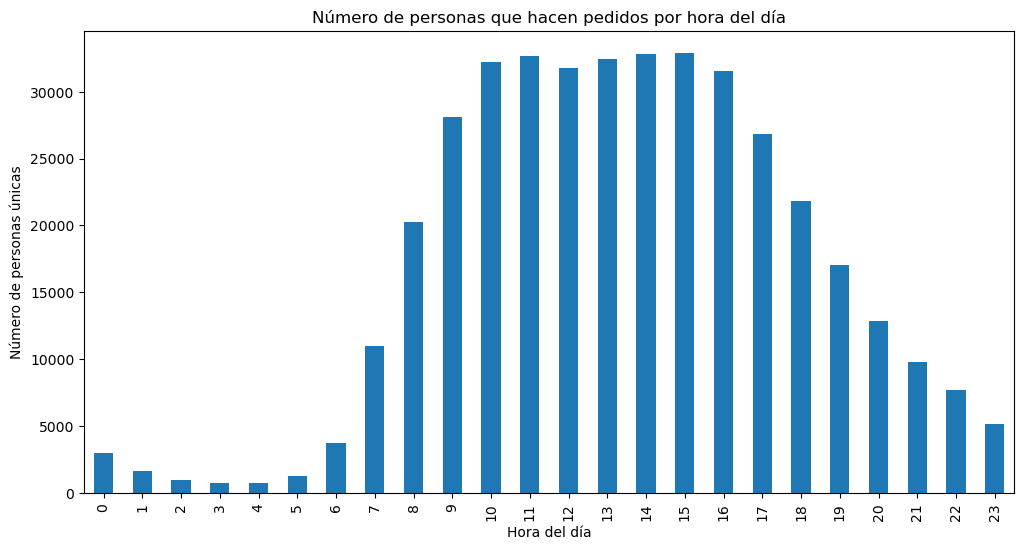

In [37]:
# Agrupar por hora del día y contar usuarios únicos
usuarios_por_hora = df_ins_order.groupby('order_hour_of_day')['user_id'].nunique()

# Crear el gráfico
usuarios_por_hora.plot(kind='bar', figsize=(12, 6),
                       title='Número de personas que hacen pedidos por hora del día',
                       xlabel='Hora del día', ylabel='Número de personas únicas')
plt.show()

Escribe aquí tus conclusiones
Escribe aquí tus conclusiones
1. se evidencia que hay más compras entre las 11am, 1pm y 2pm
2. las compras minimas estan entre las horas de la madrugada desde las 00 hasta las 6am.
3. las comparas máximas superan las 30.000 personas.

### [A3] ¿Qué día de la semana compran víveres las personas?

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


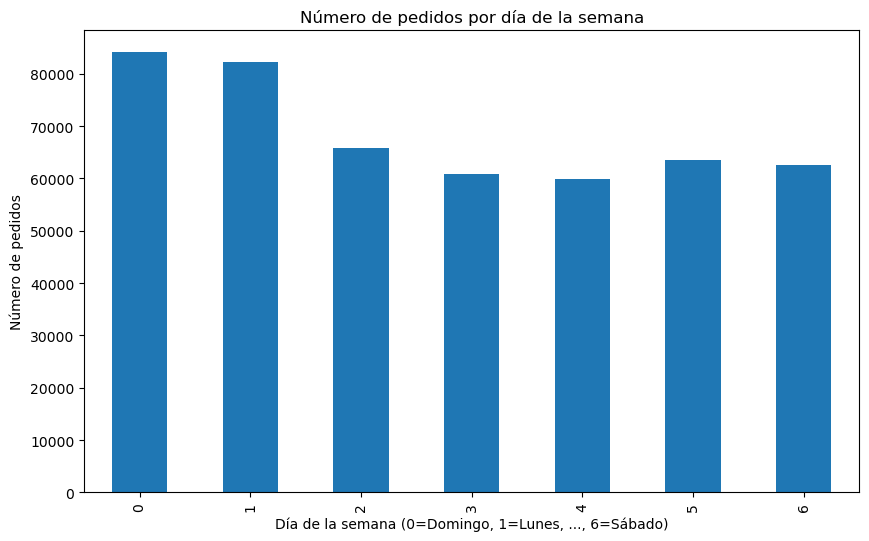

In [38]:
#Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
# Agrupar por día de la semana y cuenta los pedidos
pedidos_por_dia = df_ins_order.groupby('order_dow')['order_id'].count()
print(pedidos_por_dia)
# Crear el gráfico
pedidos_por_dia.plot(kind='bar', figsize=(10, 6),
                     title= 'Número de pedidos por día de la semana',
                     xlabel= 'Día de la semana (0=Domingo, 1=Lunes, ..., 6=Sábado)',
                     ylabel= 'Número de pedidos')
plt.show()

Escribe aquí tus conclusiones
1. los domingos y los lunes son los días con más pedidos en la semana.
2. los jueves y viernes son los días con menos pedidos a la semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Valores mínimos y máximos de days_since_prior_order:
Mínimo: 0.0
Máximo: 30.0
Promedio: 10.43


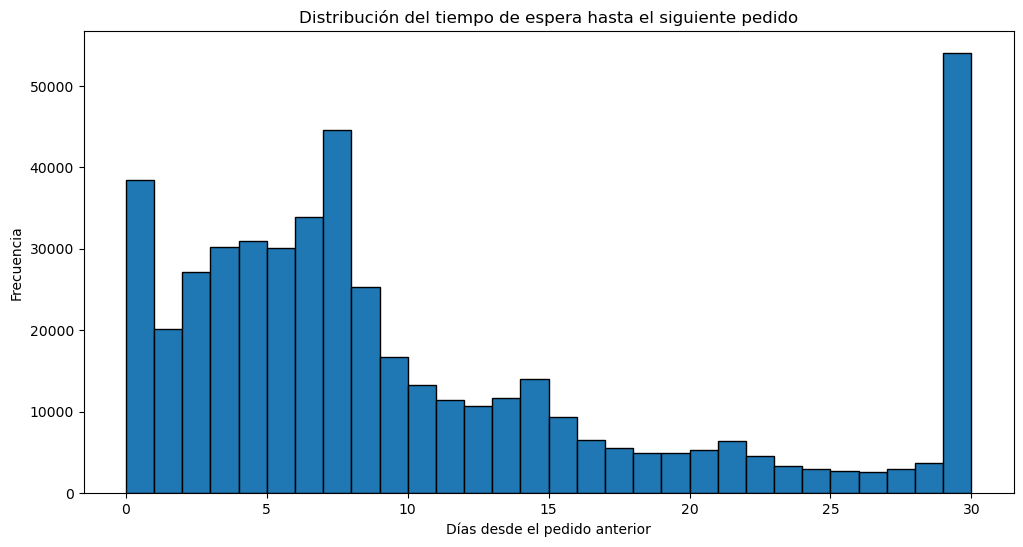

In [39]:
#Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido,
#comenta sobre los valores mínimos y máximos.

# Analizar los valores de days_since_prior_order
print("Valores mínimos y máximos de days_since_prior_order:")
print(f"Mínimo: {df_ins_order['days_since_prior_order'].min()}")
print(f"Máximo: {df_ins_order['days_since_prior_order'].max()}")
print(f"Promedio: {df_ins_order['days_since_prior_order'].mean():.2f}")

#crea un gráfico
plt.figure(figsize=(12, 6))
plt.hist(df_ins_order['days_since_prior_order'], bins=30, edgecolor='black')
plt.title('Distribución del tiempo de espera hasta el siguiente pedido')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Frecuencia')
plt.show()


Escribe aquí tus conclusiones
1. durante los primeros 10 días hay más frecuencia en realizar un pedido que los días después.
2. la mayoría de los pedidos siguientes se ven después de 30 días del primer pedido.
3. el promedio para realizar un pedido después es luego del 10mo día.

# [B] Intermedio (deben completarse todos para aprobar)
1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
# filtrar por meircoles y sabados
miercoles = df_ins_order[df_ins_order['order_dow'] == 3]
sabado = df_ins_order[df_ins_order['order_dow'] == 6]


In [41]:
# Agrupar por hora y contar pedidos para miércoles
miercoles_por_hora = miercoles.groupby('order_hour_of_day').size()

# Agrupar por hora y contar pedidos para sábados
sabado_por_hora = sabado.groupby('order_hour_of_day').size()

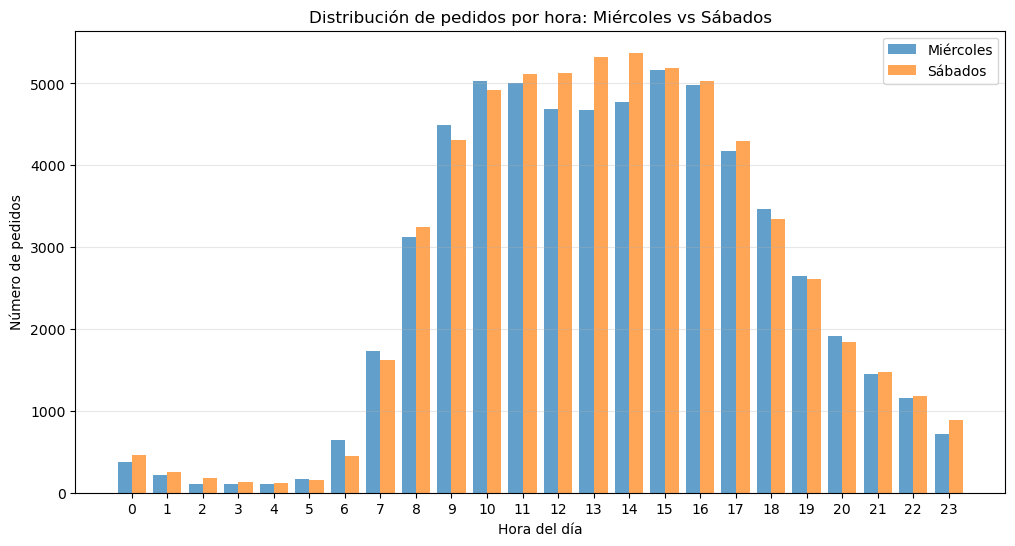

In [42]:
# Crear el gráfico de barras comparativo
plt.figure(figsize=(12, 6))
plt.bar(miercoles_por_hora.index - 0.2, miercoles_por_hora.values,
         width=0.4, label='Miércoles', alpha=0.7)
plt.bar(sabado_por_hora.index + 0.2, sabado_por_hora.values,
         width=0.4, label='Sábados', alpha=0.7)

plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Distribución de pedidos por hora: Miércoles vs Sábados')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()

Escribe aquí tus conclusiones
Conclusiones:
1. los sabados de 11am a 4pm son las horas picos de numeros de pedidos realizados por los clientes
2. Los miercoles a las 3pm es el pico mas alto de pedidos que se realiza durante el dia con más de 5000 pedidos.
3. durante la 1am y las 6am, podemos ver que no se realizan muchos pedidos.
4. el día sabado tiene más pedidos que el día miercoles.


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:

# Agrupar por cliente y contar sus pedidos
df_user_orders = df_ins_order.groupby('user_id')['order_number'].count()
print("Distribución del número de pedidos por cliente:")
print(df_user_orders.head(10))
print()
# ¿Cuántos clientes hicieron exactamente X pedidos?
distribucion_pedidos = df_user_orders.value_counts().sort_index()
print(distribucion_pedidos)


Distribución del número de pedidos por cliente:
user_id
2     2
4     2
5     1
6     2
7     2
10    1
11    2
12    1
13    3
14    4
Name: order_number, dtype: int64

order_number
1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
21       22
22       23
23       19
24        3
25        1
26        1
28        1
Name: count, dtype: int64


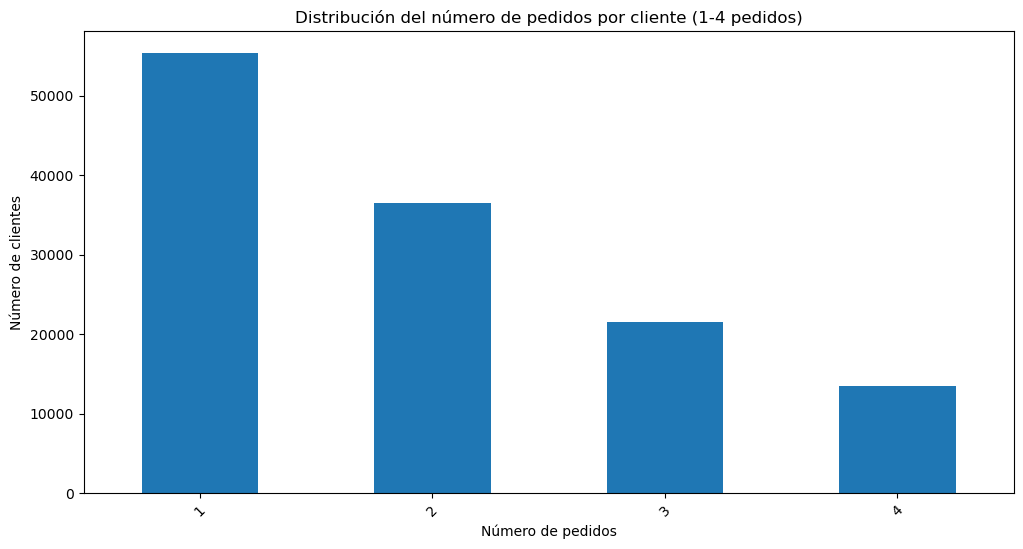

In [44]:
# Filtrar pedidos específicos
pedidos_interes = [1, 2, 3, 4]
distribucion_filtrada = distribucion_pedidos[pedidos_interes]

# Crear el gráfico
distribucion_filtrada.plot(kind='bar', figsize=(12, 6),
                           title='Distribución del número de pedidos por cliente (1-4 pedidos)',
                           xlabel='Número de pedidos',
                           ylabel='Número de clientes',
                           rot=45)
plt.show()

Escribe aquí tus conclusiones:
1. 55,357 clientes hicieron exactamente 1 pedido
2. 36,508 clientes hicieron exactamente 2 pedidos
3. 21,547 clientes hicieron exactamente 3 pedidos
4. son muchos clientes de uno o dos pedidos
5. Solo pocos clientes leales realizan al menos 10 pedidos

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
#Agrupar por porduct_id
products_popular = df_orders_pr.groupby('product_id')

#contar cuantas veces aparece cada producto y Ordenar de mayor a menor
products_popular = products_popular['order_id'].count().sort_values(ascending=False)

#Tomar los primeros 20
top_20_products= products_popular.head(20)
print('top 20 productos más populares:', top_20_products)

top 20 productos más populares: product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: order_id, dtype: int64


In [46]:
#mostrar el top 20 de productos más populares con su nombre y ID

top_20_products_df = top_20_products.reset_index()
resultado = df_products.merge(top_20_products_df, on='product_id')
resultado.head(20)


,product_id,product_name,aisle_id,department_id,order_id
0,5876,Organic Lemon,24,4,12232
1,8277,Apple Honeycrisp Organic,24,4,11993
2,13176,Bag of Organic Bananas,24,4,53297
3,16797,Strawberries,24,4,20018
4,21137,Organic Strawberries,24,4,37039
5,21903,Organic Baby Spinach,123,4,33971
6,22935,Organic Yellow Onion,83,4,15898
7,24852,Banana,24,4,66050
8,24964,Organic Garlic,83,4,15292
9,26209,Limes,24,4,19690


In [47]:
resultado[['product_id','product_name']].head(20)

,product_id,product_name
0,5876,Organic Lemon
1,8277,Apple Honeycrisp Organic
2,13176,Bag of Organic Bananas
3,16797,Strawberries
4,21137,Organic Strawberries
5,21903,Organic Baby Spinach
6,22935,Organic Yellow Onion
7,24852,Banana
8,24964,Organic Garlic
9,26209,Limes


Escribe aquí tus conclusiones
1. los productos más populares son verduras y frutas
2. entre ellos se repiten bananas y lemon
3. el producto que más compran es Organic lemon

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
#Ver los valores mínimos y máximos
items_por_pedido = df_orders_pr.groupby('order_id').count()['product_id']
items_por_pedido.head()

order_id
4     13
9     15
11     5
19     3
20     8
Name: product_id, dtype: int64

In [49]:
#Calcular estadísticas descriptivas (promedio, mediana)
items_por_pedido.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

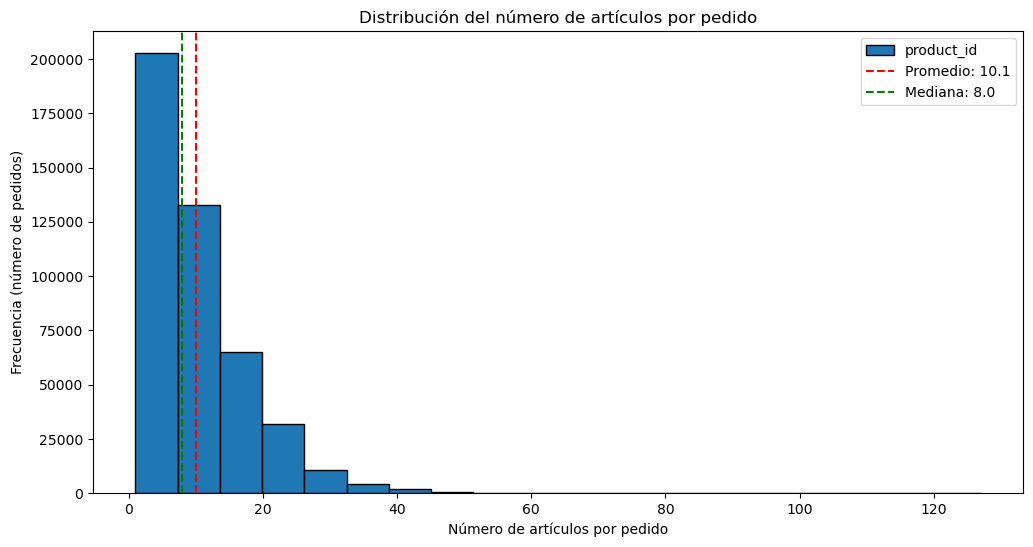

Promedio de artículos por pedido: 10.10
Mediana de artículos por pedido: 8.00
Desviación estándar: 7.54


In [50]:
#Crear un histograma para visualizar la distribución
items_por_pedido.plot(bins=20, figsize=(12,6), kind= 'hist',
                     title= 'Distribución del número de artículos por pedido',
                     edgecolor='black',
                     xlabel= 'Número de artículos por pedido',
                     ylabel= 'Frecuencia (número de pedidos)')

# Agregar estadísticas en el gráfico
mean_items = items_por_pedido.mean()
median_items = items_por_pedido.median()
plt.axvline(mean_items, color='red', linestyle='--', label=f'Promedio: {mean_items:.1f}')
plt.axvline(median_items, color='green', linestyle='--', label=f'Mediana: {median_items:.1f}')
plt.legend()
plt.show()

# Mostrar estadísticas adicionales
print(f"Promedio de artículos por pedido: {mean_items:.2f}")
print(f"Mediana de artículos por pedido: {median_items:.2f}")
print(f"Desviación estándar: {items_por_pedido.std():.2f}")

Escribe aquí tus conclusiones
1. Promedio de artículos por pedido: 10.10
2. Mediana de artículos por pedido: 8.00
3. la frecuencia mayor de realizar pedidos es de 10 articulos

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
# Filtrar solo los productos reordenados
productos_reordenados = df_orders_pr[df_orders_pr['reordered'] == 1]

In [52]:
# Contar cuántas veces cada producto fue reordenado
frecuencia_reorden = productos_reordenados['product_id'].value_counts()
print("Top 10 productos más reordenados:")
print(frecuencia_reorden.head(10))

Top 10 productos más reordenados:
product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
Name: count, dtype: int64


In [53]:
# Obtener los top 20 productos más reordenados
top_20_reordenados = frecuencia_reorden.head(20)
print(top_20_reordenados)

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: count, dtype: int64


In [54]:
# Convertir el resultado a DataFrame para poder hacer merge
top_20_reordenados_df = top_20_reordenados.reset_index()
top_20_reordenados_df.columns = ['product_id', 'reorder_count']

# Hacer merge con la tabla products para obtener los nombres
resultado_c2 = top_20_reordenados_df.merge(df_products, on='product_id', how='left')

# Mostrar solo las columnas que necesitas
resultado_final = resultado_c2[['product_id', 'product_name', 'reorder_count']]
print("Top 20 productos más reordenados:")
print(resultado_final)



Top 20 productos más reordenados:
    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic Fuji Apple           8989
16        8277

Escribe aquí tus conclusiones
1. los 3 productos más populares on: Banana (55,763 reórdenes),Bag of Organic Bananas (44,450 reórdenes), Organic Strawberries (28,639 reórdenes)
2. los clientes prefieren más los producto organicos, 16/20 son especificamente organicos
3. los clientes buscan más productos que sean organicos y saludables.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [55]:
# Contar el total de veces que se pidió cada producto
total_pedidos_por_producto = df_orders_pr.groupby('product_id').size()
print("Total de pedidos por producto (primeros 10):")
print(total_pedidos_por_producto.head(10))

Total de pedidos por producto (primeros 10):
product_id
1     280
2      11
3      42
4      49
7       2
8      19
9      21
10    337
11     16
12     41
dtype: int64


In [56]:
# Contar cuántas veces cada producto fue reordenado
reordenes_por_producto = df_orders_pr[df_orders_pr['reordered'] == 1].groupby('product_id').size()
print("Reórdenes por producto (primeros 10):")
print(reordenes_por_producto.head(10))

Reórdenes por producto (primeros 10):
product_id
1     158
3      31
4      25
7       1
8       6
9      16
10    151
11     10
12     16
13      1
dtype: int64


In [57]:
def calcular_tasa_reorden(product_id):
    total = total_pedidos_por_producto[product_id]
    reordenes = reordenes_por_producto.get(product_id, 0)
    return reordenes / total

# Aplicar la función a todos los productos
tasas_reorden = {}
for product_id in total_pedidos_por_producto.index:
    tasas_reorden[product_id] = calcular_tasa_reorden(product_id)


# Convertir el diccionario a DataFrame
df_tasas = pd.DataFrame(list(tasas_reorden.items()),
                       columns=['product_id', 'reorder_proportion'])
# Hacer merge para obtener los nombres de productos
resultado = df_tasas.merge(df_products, on='product_id', how='left')

cols = ['product_id','product_name', 'reorder_proportion']
resultado = resultado[cols].sort_values('reorder_proportion', ascending=False)
resultado['reorder_proportion'] = (resultado['reorder_proportion'] * 100).round(2)
resultado.head(10)

,product_id,product_name,reorder_proportion
13453,14721,Bone Strength Take Care,100.0
19195,20949,Vanilla Sandwich Cookies,100.0
6136,6723,Palmiers- Petite,100.0
6144,6732,Naturally Sparkling Mineral Water,100.0
41319,45088,California Dill Pollen & Garlic Goat Cheese & ...,100.0
41310,45078,Pomegranatea,100.0
19258,21016,Parchment Lined 8 in x 3.75 in x 2.5 in Pans,100.0
19248,21005,Peanut Butter Pie Ice Cream,100.0
32273,35192,Chocolate Soy Milk Singles,100.0
32277,35197,Mocha Chocolate Chip Organic Non-Dairy Frozen...,100.0


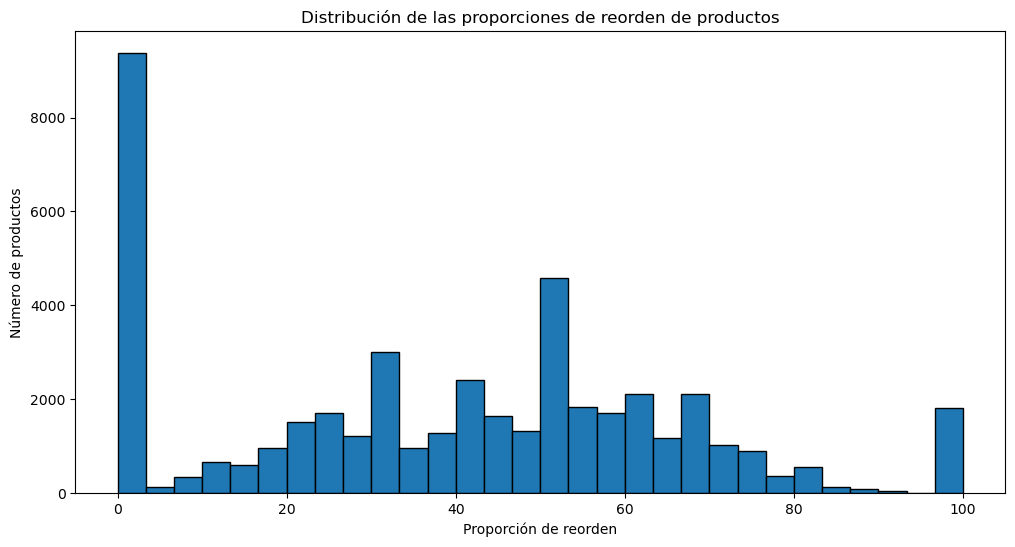

In [58]:
plt.figure(figsize=(12, 6))
plt.hist(resultado['reorder_proportion'], bins=30, edgecolor='black')
plt.title('Distribución de las proporciones de reorden de productos')
plt.xlabel('Proporción de reorden')
plt.ylabel('Número de productos')
plt.show()

Escribe tus conclusiones:
1. Un pico muy alto cerca del 0% (productos que casi nunca se reordenan)
2. Otro pico significativo cerca del 100% (productos que casi siempre se reordenan)
3. Los productos con baja proporción podrían ser compras impulsivas o experimentales
4. Los productos con alta proporción son probablemente artículos básicos del hogar y comestibles organicos

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
#conectar las tablas en común
df_merged = df_ins_order.merge(df_orders_pr, on='order_id')
stats_by_user = df_merged.groupby('user_id')['reordered'].agg(['count', 'sum'])
print(stats_by_user.head())
print()

#calcular las proporciones del reorden
prod_reord = stats_by_user['sum']
tot_prod_ped = stats_by_user['count']
proporcion = prod_reord / tot_prod_ped
print(proporcion.describe())

         count  sum
user_id            
2           26    1
4            2    0
5           12    8
6            4    0
7           14   13

count    149626.000000
mean          0.494853
std           0.292685
min           0.000000
25%           0.272727
50%           0.500000
75%           0.724138
max           1.000000
dtype: float64


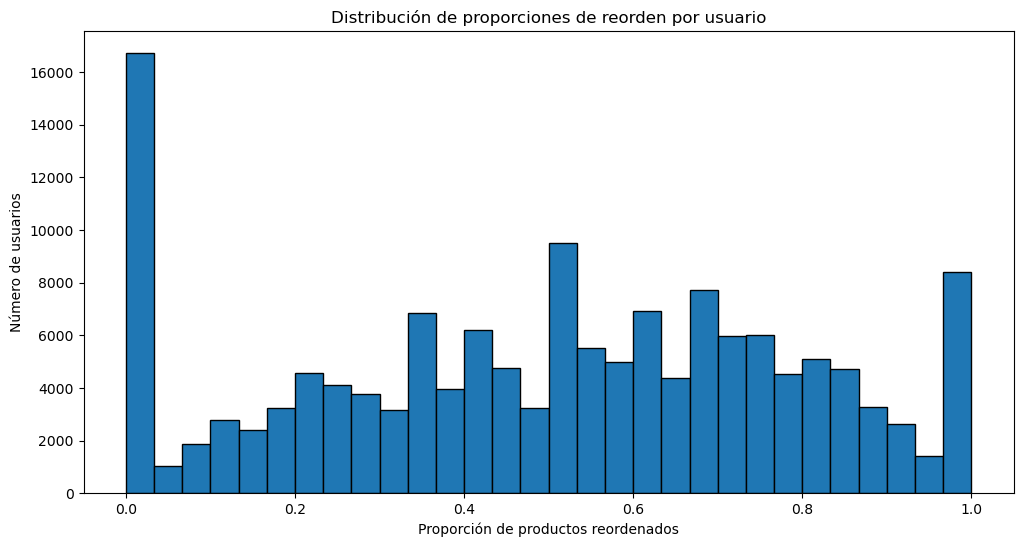

In [60]:
#graficar en un histograma la distribución de las proporciones por usuario
plt.figure(figsize=(12, 6))
plt.hist(proporcion, bins=30, edgecolor='black')
plt.title('Distribución de proporciones de reorden por usuario')
plt.xlabel('Proporción de productos reordenados')
plt.ylabel('Número de usuarios')
plt.show()

1. El promedio de reorden por usuario es del 49.5%, lo que indica un equilibrio entre productos nuevos y repetidos
2. La distribución muestra que hay usuarios muy leales (cerca del 100% de reorden) y usuarios experimentales (cerca del 0%)
3. La mayoría de usuarios tiene una proporción de reorden entre 25% y 75%
4. Esto sugiere diferentes tipos de comportamiento de compra en la plataforma.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
#Filtrar los productos que son inicialmente añadidos al carrito de compras
prod_iniciales = df_orders_pr[df_orders_pr['add_to_cart_order']==1]

# Contar cuántas veces cada producto fue el primero en ser añadido
print(f'Número de productos que fueron añadidos primero en el carrito de compras: {len(prod_iniciales)}')
print()

# Contar cuántas veces cada producto fue el primero en ser añadido
conteo_primeros = prod_iniciales['product_id'].value_counts()
print("Top 10 productos más añadidos primero:")
print(conteo_primeros.head(10))

Número de productos que fueron añadidos primero en el carrito de compras: 450046

Top 10 productos más añadidos primero:
product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
Name: count, dtype: int64


In [62]:
# Obtener los nombres de esos productos
# Obtener el top 20
top_20_primeros = conteo_primeros.head(20)
print("Top 20 productos añadidos primero:")
print(top_20_primeros)

Top 20 productos añadidos primero:
product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
43352     1246
Name: count, dtype: int64


In [63]:
# Mostrar el top 20
# Convertir la Serie a DataFrame
top_20_df = top_20_primeros.reset_index()
top_20_df.columns = ['product_id', 'veces_primero']

# Hacer el merge
resultado = top_20_df.merge(df_products, on='product_id')
resultado.head(20)

,product_id,veces_primero,product_name,aisle_id,department_id
0,24852,15562,Banana,24,4
1,13176,11026,Bag of Organic Bananas,24,4
2,27845,4363,Organic Whole Milk,84,16
3,21137,3946,Organic Strawberries,24,4
4,47209,3390,Organic Hass Avocado,24,4
5,21903,3336,Organic Baby Spinach,123,4
6,47766,3044,Organic Avocado,24,4
7,19660,2336,Spring Water,115,7
8,16797,2308,Strawberries,24,4
9,27966,2024,Organic Raspberries,123,4


Escribe aquí tus conclusiones
1. 450,046 productos que fueron añadidos primero al carrito.
2. Banana (ID: 24852) es el producto más añadido primero al carrito con 15,562 veces
3. Bag of Organic Bananas (ID: 13176) es el segundo con 11,026 veces
4. Organic Whole Milk (ID: 27845) es el tercero con 4,363 veces
5. La mayoría de productos que se añaden primero son frutas y verduras frescas
6. Muchos son productos orgánicos
7. Incluye productos básicos como leche, agua y limones

### Conclusion general del proyecto:

1. __Patrones de Compra:__
* Horarios pico: Los clientes prefieren hacer pedidos entre las 10 AM y 4 PM
* Días preferidos: Domingos y lunes son los días más populares para comprar
* Diferencias semanales: Los sábados muestran patrones diferentes a los miércoles
  
2. __Comportamiento de Recompra:__
* Alta fidelidad: Los clientes tienden a recomprar los mismos productos frecuentemente
* Productos básicos: Artículos como bánanos, leche y productos orgánicos tienen altas tasas de recompra
* Patrón individual: Cada cliente tiene su propia proporción de recompra
  
3. __Composición del Carrito:__
* Productos iniciales: Los clientes empiezan con productos básicos (frutas, verduras, lácteos)
* Planificación: La elección del primer producto sugiere compras planificadas, no impulsivas
* Preferencia orgánica: Fuerte tendencia hacia productos orgánicos
  
4. __Insights de Negocio__
   __Para Instacart:__
* Optimizar inventario de productos básicos y orgánicos
* Enfocar marketing en horarios pico (10 AM - 4 PM)
* Crear promociones para domingos y lunes

__Para los proveedores:__
* Los productos frescos y orgánicos tienen alta demanda
* Oportunidad de posicionar productos como "primeros en el carrito"